In [1]:
import os

import numpy as np
import tensorflow as tf

from tensorflow_vgg import vgg16
from tensorflow_vgg import utils

In [2]:
import csv

with open('/home/bhavyateja_potineni/image_tagging/transfer-learning/model_all_8_classes_3/labels_for_8_classes') as f:
    reader = csv.reader(f, delimiter='\n')
    labels = np.array([each for each in reader if len(each) > 0]).squeeze()

In [3]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
lb.fit(labels)
labels_vecs = lb.transform(labels)

In [4]:
print(labels_vecs.shape[1],lb.classes_)

8 ['backyard' 'bathrooms' 'bedrooms' 'dining_room' 'empty_rooms' 'frontyard'
 'kitchens' 'living_rooms']


In [5]:
inputs_ = tf.placeholder(tf.float32, shape=[None, 4096])
labels_ = tf.placeholder(tf.int64, shape=[None, labels_vecs.shape[1]])
fc = tf.contrib.layers.fully_connected(inputs_, 256)
logits = tf.contrib.layers.fully_connected(fc, labels_vecs.shape[1], activation_fn=None)
predicted = tf.nn.softmax(logits)
correct_pred = tf.equal(tf.argmax(predicted, 1), tf.argmax(labels_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.ndimage import imread

In [7]:
import pickle
with open('success_vec_protocol_1.pickle','rb') as f:
    homes_codes = pickle.load(f)

In [8]:
image_paths = '/home/bhavyateja_potineni/homes_img/'
images = os.listdir(image_paths)

In [9]:
import random
random_images = random.sample(list(homes_codes.keys()),50)

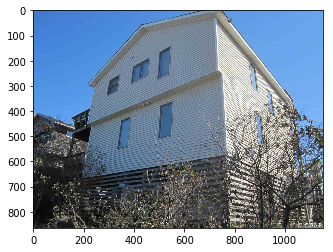

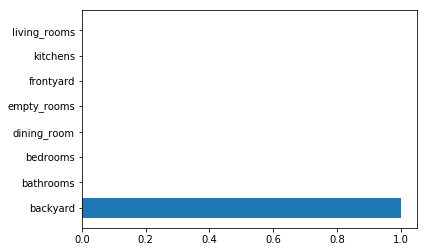

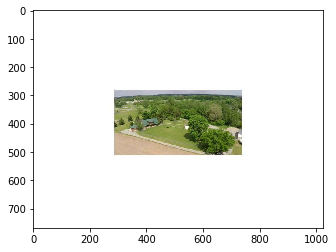

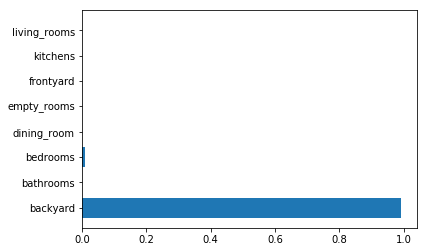

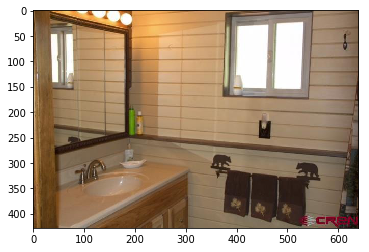

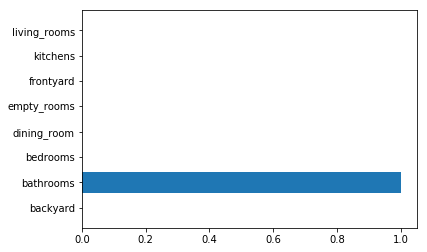

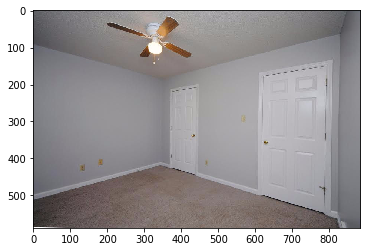

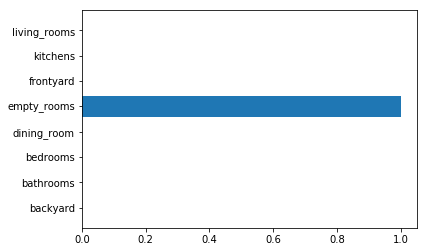

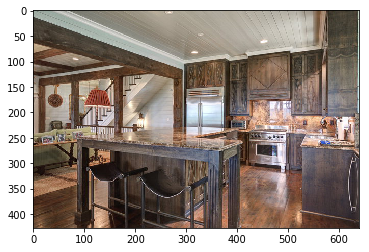

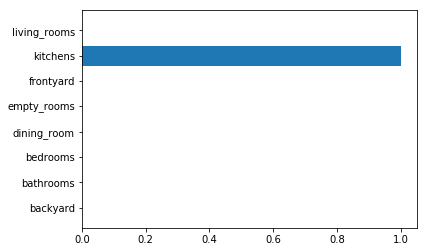

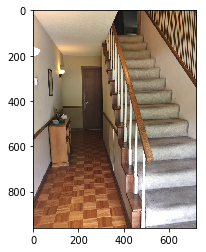

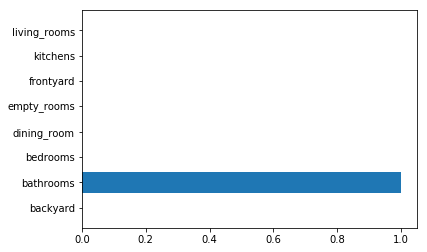

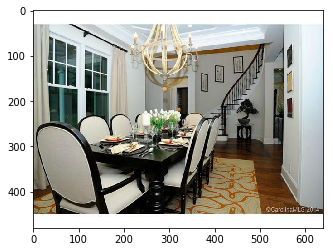

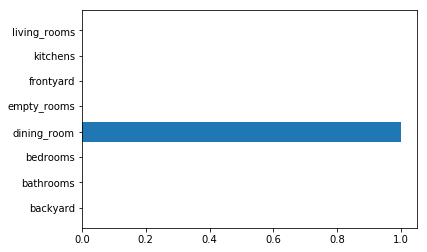

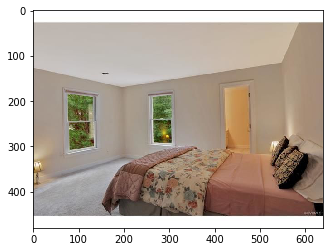

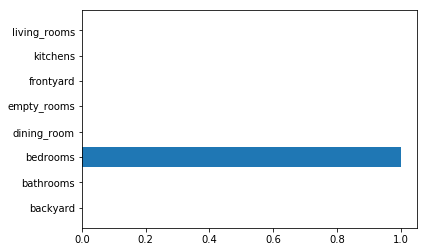

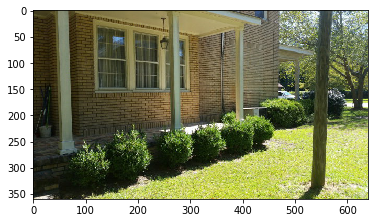

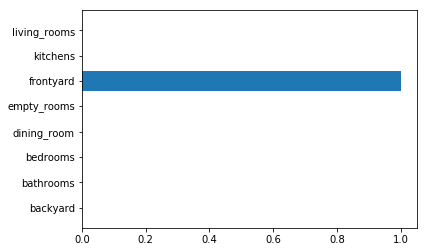

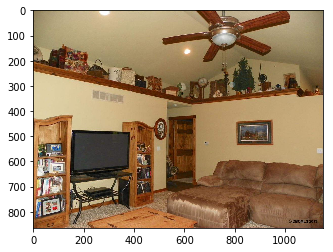

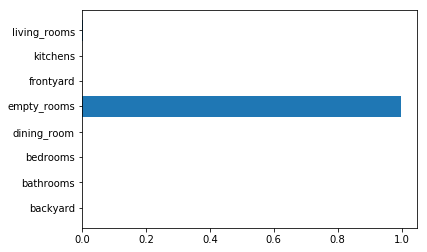

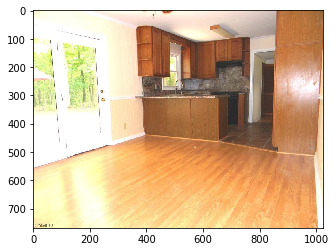

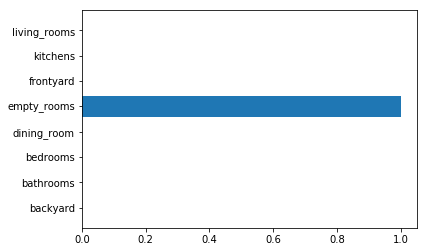

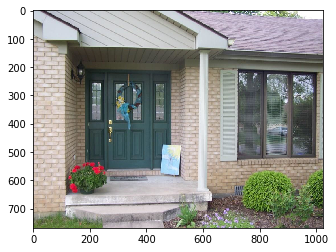

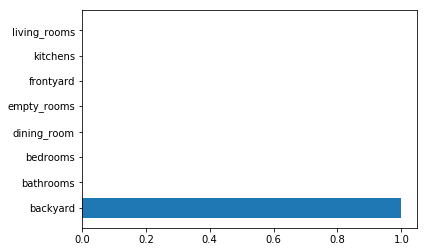

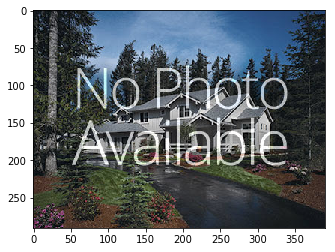

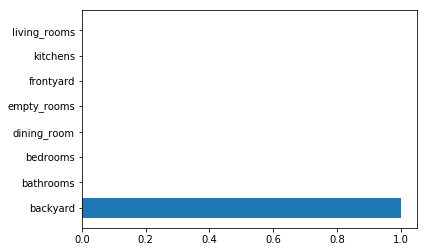

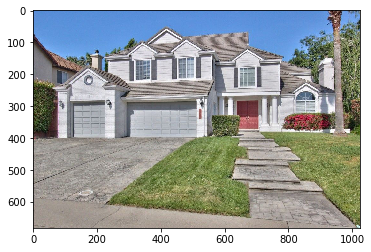

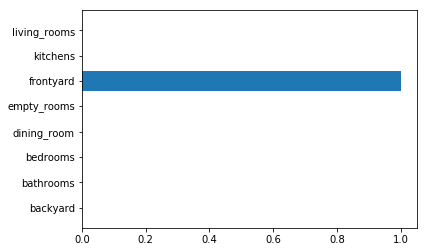

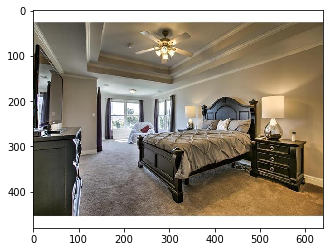

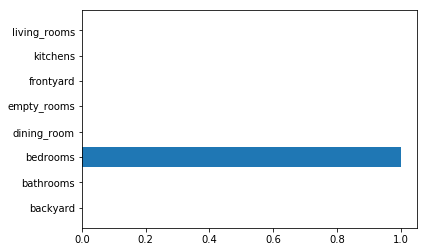

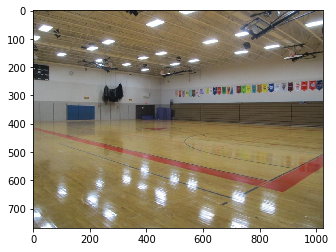

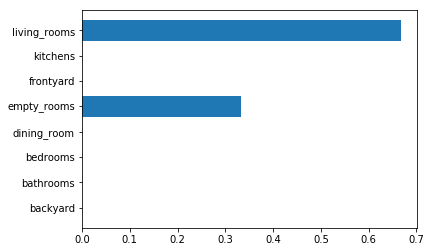

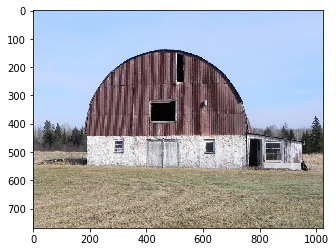

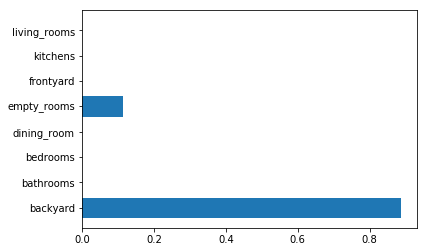

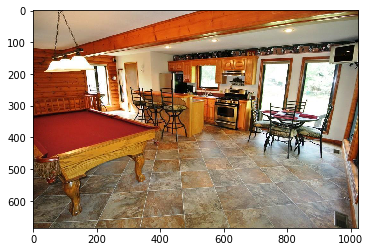

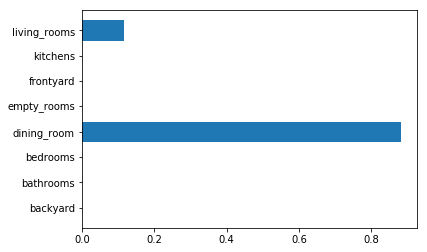

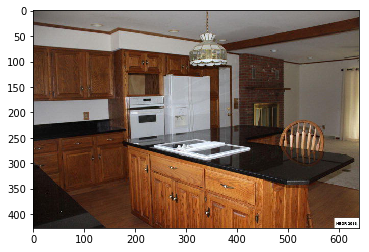

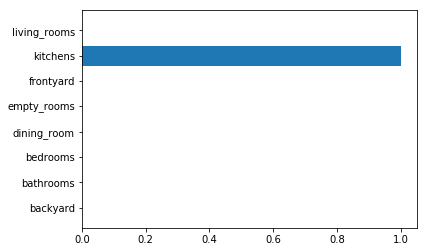

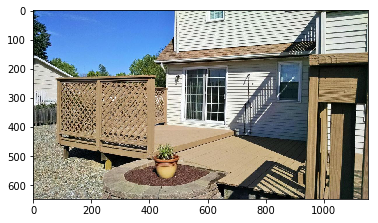

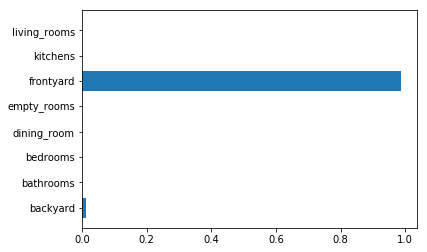

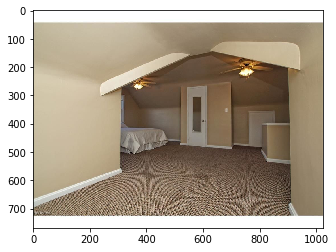

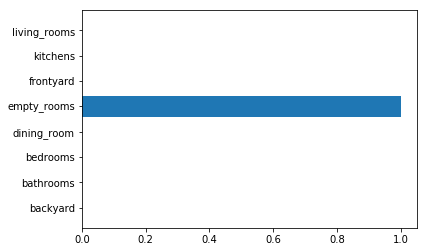

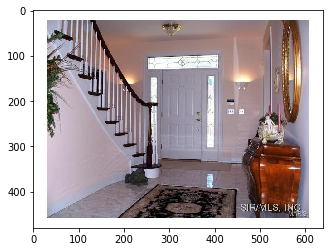

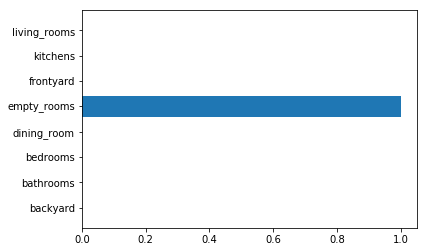

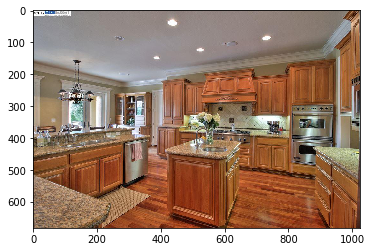

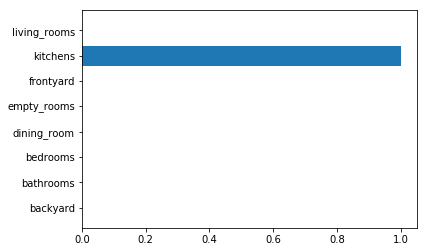

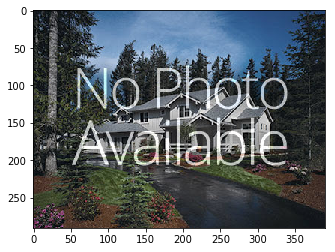

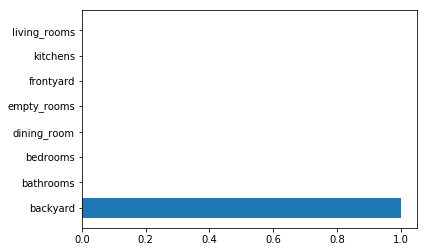

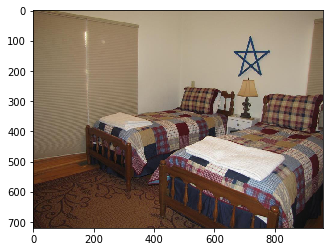

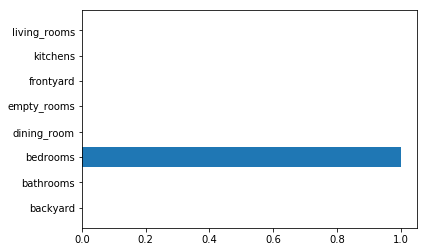

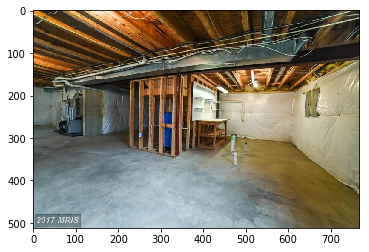

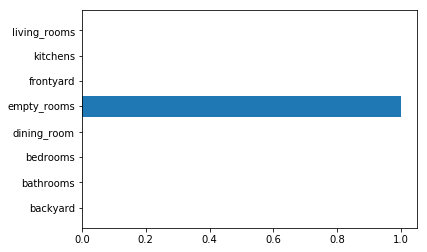

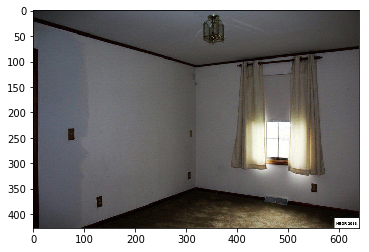

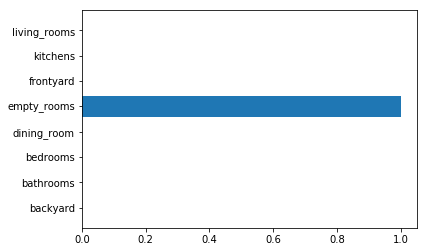

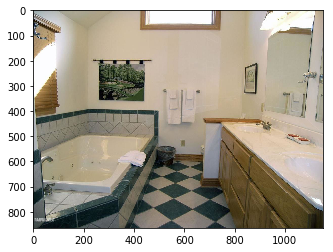

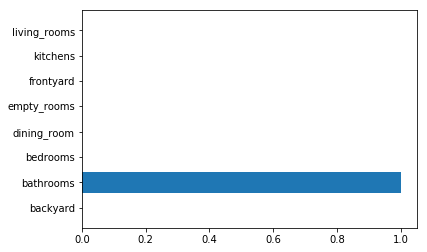

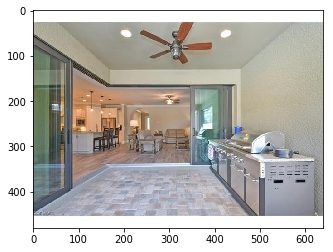

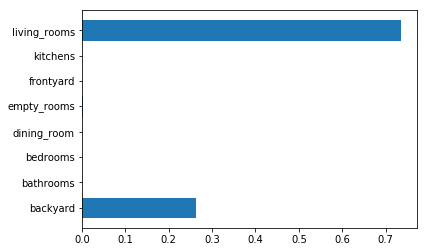

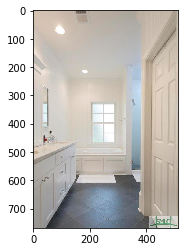

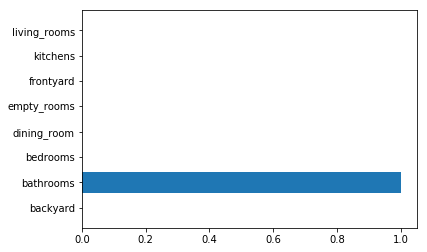

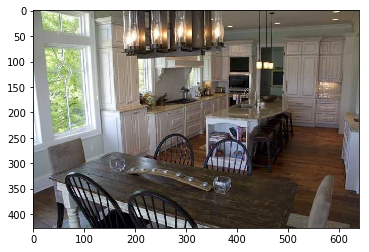

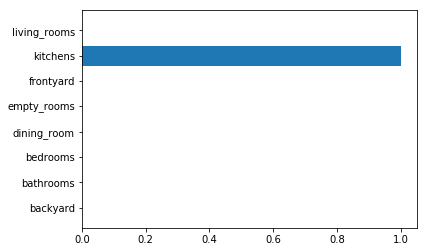

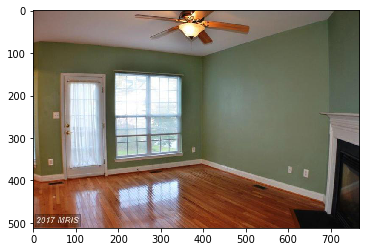

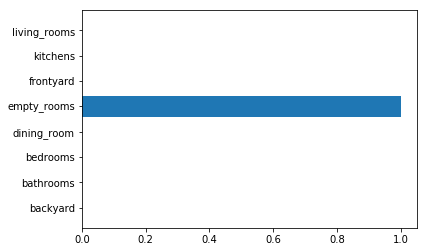

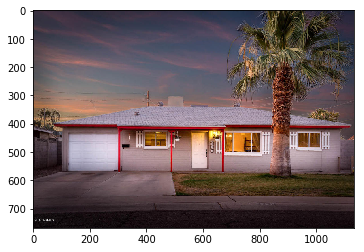

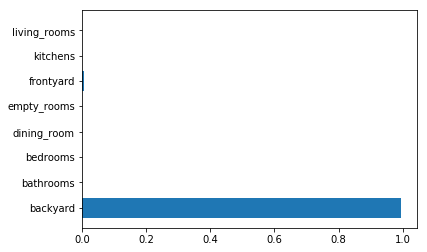

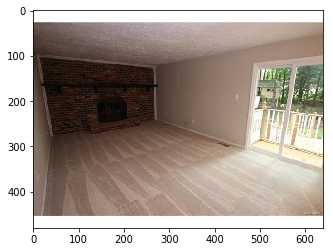

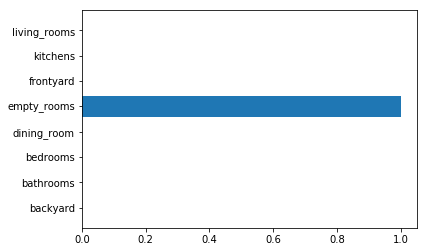

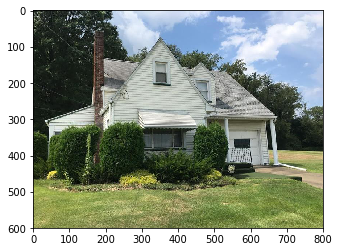

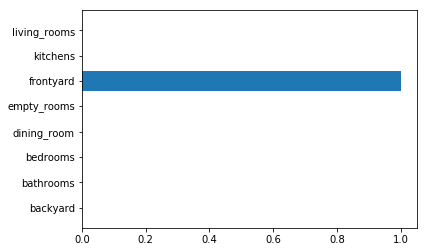

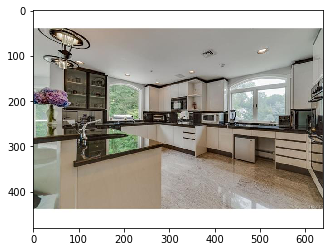

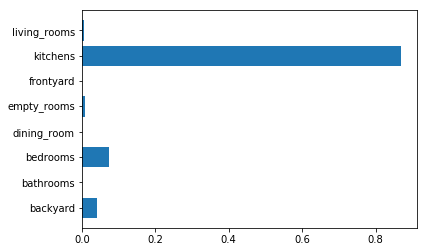

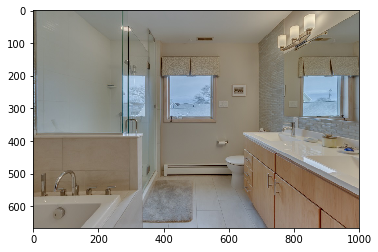

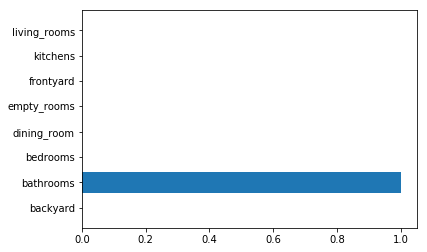

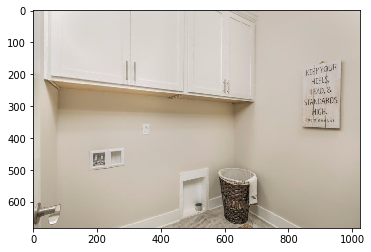

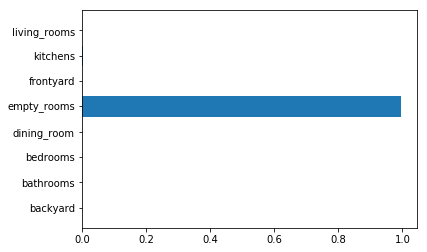

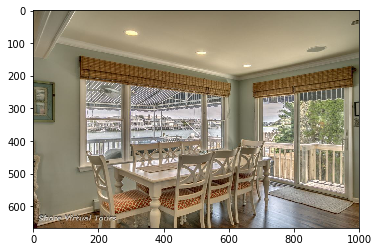

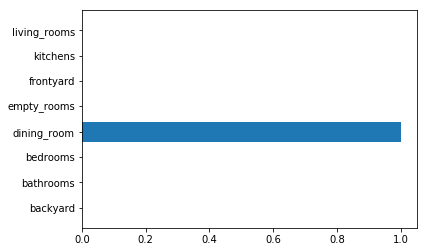

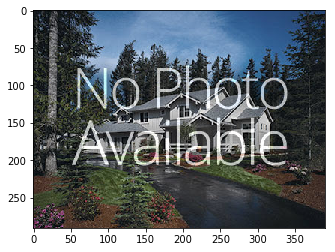

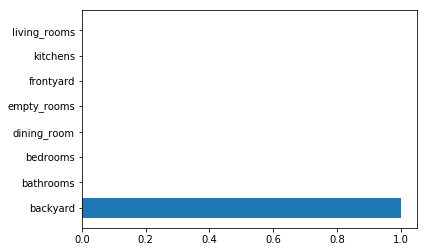

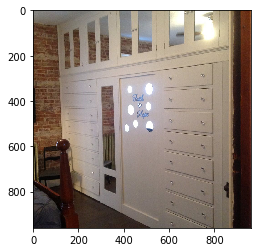

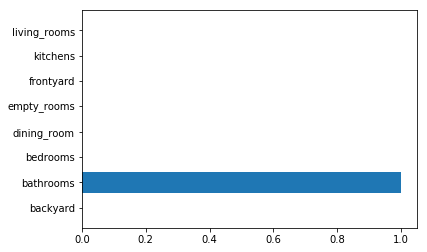

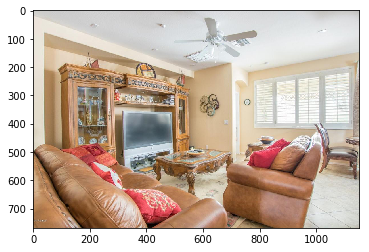

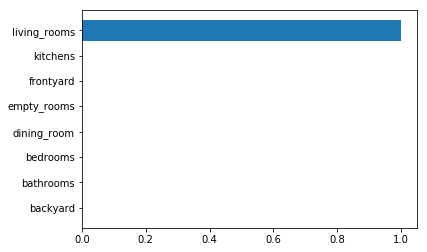

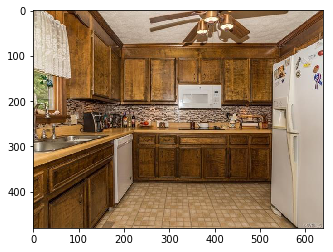

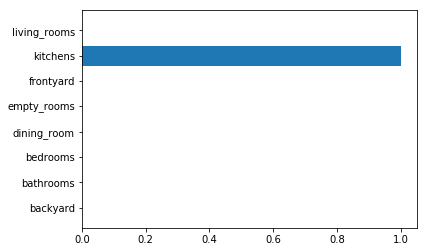

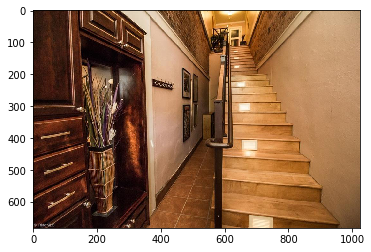

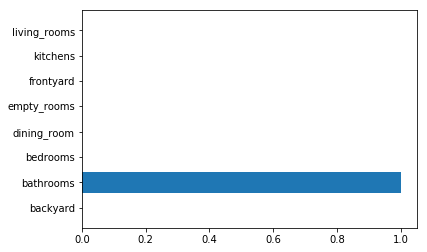

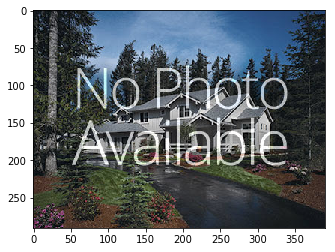

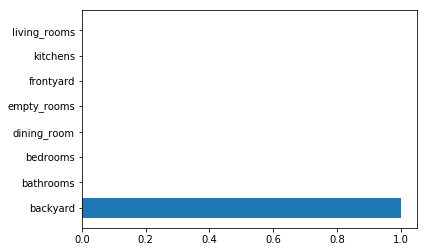

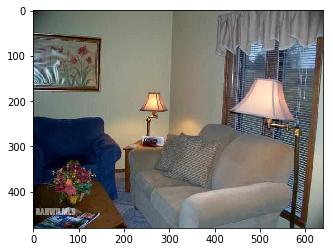

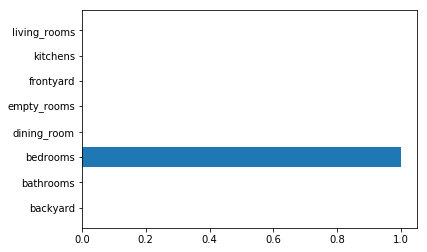

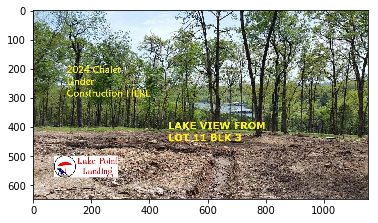

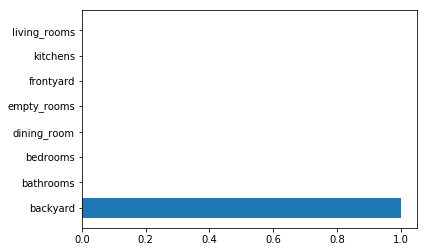

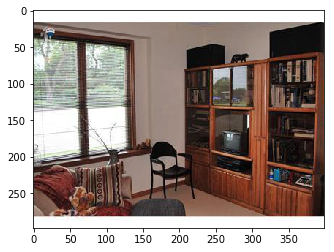

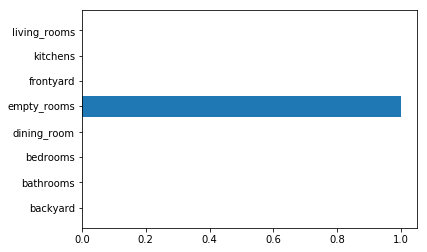

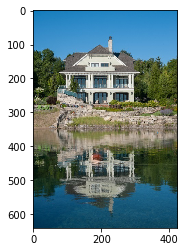

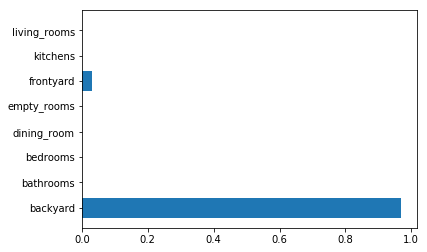

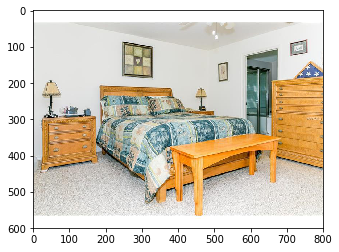

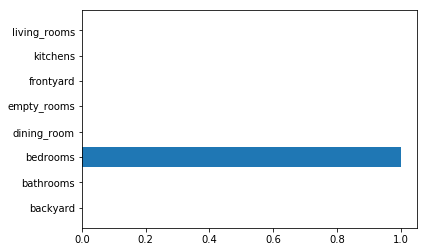

In [10]:
saver = tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('/home/bhavyateja_potineni/image_tagging/transfer-learning/model_all_8_classes_3/checkpoints'))
    for i in random_images:
        test_img_path = image_paths+i
        test_img = imread(test_img_path)
        feed = {inputs_:homes_codes[i]}
        prediction = sess.run(predicted, feed_dict=feed).squeeze()
        plt.imshow(test_img)
        plt.show()
        plt.barh(np.arange(labels_vecs.shape[1]), prediction)
        _ = plt.yticks(np.arange(labels_vecs.shape[1]), lb.classes_)
        plt.show()
        
        
        
        
        
        